# Stock Health Analysis 

In [86]:
import pandas as pd
import numpy as np


### Loading data

In [114]:
data = pd.read_csv('Grocery_Inventory new v1.csv')

### Data exploration

In [51]:
data.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


In [ ]:
data.info()

In [ ]:
data.Status.unique()

In [132]:
data['Unit_Price'] = data['Unit_Price'].fillna(0)
data['Unit_Price'] = data['Unit_Price'].replace('[\$,]', '', regex=True)
data['Unit_Price'] = pd.to_numeric(data['Unit_Price'])

In [115]:
data['Stock_Gap'] =  data['Stock_Quantity'] - data['Reorder_Level']

In [116]:
import numpy as np

conditions = [
    data['Stock_Gap'] > data['Reorder_Quantity'],
    (data['Stock_Gap'] > 0) & (data['Stock_Gap'] <= data['Reorder_Quantity']),
    data['Stock_Gap'] == 0,
    data['Stock_Gap'] < 0
]

choices = ['Overstocked', 'Healthy', 'Reorder', 'Understocked']

data['Stock_Health'] = np.select(conditions, choices, default='Unknown')

In [5]:
data.groupby('Stock_Health').size()

Stock_Health
Healthy         339
Overstocked     186
Reorder          10
Understocked    455
dtype: int64

In [133]:
active_data = data[data['Status'] == 'Active']

In [63]:
active_data.groupby('Stock_Health').size()

Stock_Health
Healthy         119
Overstocked      73
Reorder           4
Understocked    136
dtype: int64

With nearly 70% of our products currently understocked, we need to conduct a thorough analysis of this trend from multiple perspectives.


In [59]:
Understocked = active_data[active_data['Stock_Health'] == 'Understocked']

### Understocked products per category

In [69]:
total_per_category = active_data.groupby('Catagory').size()
Understocked_Per_Category = Understocked.groupby('Catagory').size().sort_values(ascending=False)

In [70]:
category_summary = pd.DataFrame({
    'total_products': total_per_category,
    'understocked_count': Understocked_Per_Category,
})
category_summary['understocked_percentage'] = (category_summary['understocked_count'] / category_summary['total_products']) * 100

# Clean and sort
category_summary = category_summary.fillna(0).sort_values(by='understocked_count', ascending=False)

In [71]:
print(category_summary)

                     total_products  understocked_count  \
Catagory                                                  
Fruits & Vegetables             108                  52   
Grains & Pulses                  56                  24   
Seafood                          36                  15   
Beverages                        31                  14   
Dairy                            56                  14   
Bakery                           22                  10   
Oils & Fats                      23                   7   

                     understocked_percentage  
Catagory                                      
Fruits & Vegetables                48.148148  
Grains & Pulses                    42.857143  
Seafood                            41.666667  
Beverages                          45.161290  
Dairy                              25.000000  
Bakery                             45.454545  
Oils & Fats                        30.434783  


Our initial analysis of understocked products by category revealed no clear pattern, suggesting that understocking isn't a category-specific issue.

### Understocked products per supplier

In [72]:
total_per_supplier = active_data.groupby('Supplier_Name').size()
Understocked_Per_Supplier = Understocked.groupby('Supplier_Name').size().sort_values(ascending=False)

In [73]:
supplier_summary = pd.DataFrame({
    'total_products': total_per_supplier,
    'understocked_count': Understocked_Per_Supplier,
})
supplier_summary['understocked_percentage'] = (supplier_summary['understocked_count'] / supplier_summary['total_products']) * 100

# Clean and sort
supplier_summary = supplier_summary.fillna(0).sort_values(by='understocked_count', ascending=False)

In [74]:
print(supplier_summary)

               total_products  understocked_count  understocked_percentage
Supplier_Name                                                             
Linklinks                   3                 3.0                    100.0
Shuffledrive                4                 3.0                     75.0
Quatz                       4                 3.0                     75.0
Vidoo                       2                 2.0                    100.0
Flashspan                   2                 2.0                    100.0
...                       ...                 ...                      ...
Midel                       2                 0.0                      0.0
Mybuzz                      3                 0.0                      0.0
Mycat                       1                 0.0                      0.0
Mymm                        1                 0.0                      0.0
Zoozzy                      1                 0.0                      0.0

[233 rows x 3 columns]


Understocking appears to be a widespread issue, not confined to particular suppliers. This suggests a more systemic inventory management challenge that may require policy-level intervention, rather than category or supplier-specific fixes.

### Products in critical shortage

In [118]:
active_data['Gap_Ratio'] = active_data['Stock_Gap'] / active_data['Reorder_Level']

C:\Users\hp\AppData\Local\Temp\ipykernel_17716\3419675150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_data['Gap_Ratio'] = active_data['Stock_Gap'] / active_data['Reorder_Level']


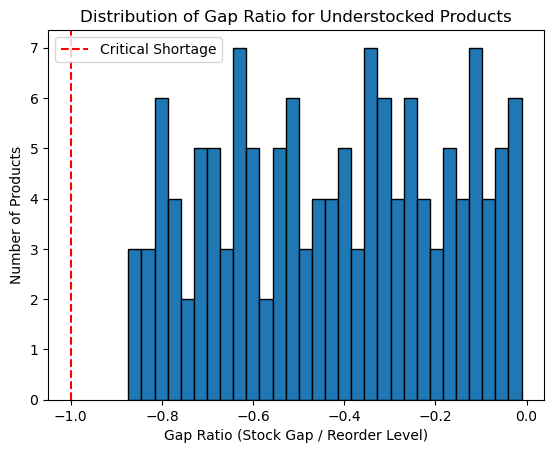

In [79]:
import matplotlib.pyplot as plt

df_under = active_data[active_data['Stock_Health'] == 'Understocked']
plt.hist(df_under['Gap_Ratio'], bins=30, edgecolor='black')
plt.title('Distribution of Gap Ratio for Understocked Products')
plt.xlabel('Gap Ratio (Stock Gap / Reorder Level)')
plt.ylabel('Number of Products')
plt.axvline(x=-1, color='red', linestyle='--', label='Critical Shortage')
plt.legend()
plt.show()


In [ ]:
critical_shortage = active_data[active_data['Gap_Ratio'] <= -0.8]

critical_shortage_sorted = critical_shortage.sort_values(by='Gap_Ratio')

critical_products = critical_shortage_sorted[['Product_Name', 'Catagory', 'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Gap_Ratio']]


In [81]:
critical_products

,Product_Name,Catagory,Supplier_Name,Stock_Quantity,Reorder_Level,Gap_Ratio
332,Haddock,Seafood,Eire,11,87,-0.873563
948,Basmati Rice,Grains & Pulses,Yodo,11,87,-0.873563
195,Black Coffee,Beverages,Youfeed,11,72,-0.847222
242,Whipped Cream,Dairy,Devcast,14,87,-0.839080
430,Sesame Oil,Oils & Fats,Yotz,14,84,-0.833333
510,Pineapple,Fruits & Vegetables,Rhyloo,14,81,-0.827160
94,Avocado Oil,Oils & Fats,Dabjam,14,75,-0.813333
144,Black Rice,Grains & Pulses,Wordware,11,58,-0.810345
637,Plum,Fruits & Vegetables,Yambee,11,58,-0.810345
6,Coconut Sugar,Grains & Pulses,Lazz,17,85,-0.800000


Although a large number of products are understocked, the severity of the shortage is generally low.

Only 10 products have a gap ratio ≤ -0.8, meaning:

Most understocked items still have a decent amount of stock left compared to their reorder level.

This suggests the situation is not critical overall, but:

We should focus first on restocking the 10 most understocked products, as they represent the highest risk of stockouts.

## Overstocked products

In [119]:
Overstocked = active_data[active_data['Stock_Health'] == 'Overstocked']

### Overstocked products by category

In [83]:
Overstocked_Per_Category = Overstocked.groupby('Catagory').size().sort_values(ascending=False)

In [ ]:
category_summary_over = pd.DataFrame({
    'total_products': total_per_category,
    'overstocked_count': Overstocked_Per_Category,
})
category_summary_over['overstocked_percentage'] = (category_summary_over['overstocked_count'] / category_summary_over['total_products']) * 100

category_summary_over = category_summary_over.fillna(0).sort_values(by='overstocked_count', ascending=False)

In [85]:
print(category_summary_over)

                     total_products  overstocked_count  overstocked_percentage
Catagory                                                                      
Dairy                            56                 20               35.714286
Fruits & Vegetables             108                 16               14.814815
Grains & Pulses                  56                 11               19.642857
Beverages                        31                  8               25.806452
Bakery                           22                  6               27.272727
Oils & Fats                      23                  6               26.086957
Seafood                          36                  6               16.666667


While dairy products exhibit the highest percentage of overstocking, the difference compared to other categories isn't substantial. This further supports the conclusion that overstocking isn't a category-specific problem

### Low demand overstocked products

In [91]:
low_demand_overstock = Overstocked[Overstocked['Sales_Volume'] <= np.quantile(Overstocked['Sales_Volume'], 0.25)]


In [92]:
low_demand_overstock[['Product_Name', 'Catagory', 'Stock_Quantity', 'Unit_Price', 'Sales_Volume']]


,Product_Name,Catagory,Stock_Quantity,Unit_Price,Sales_Volume
60,Anchovies,Seafood,83,$10.00,33
78,Pineapple,Fruits & Vegetables,68,$3.50,25
92,Almond Flour,Grains & Pulses,76,$9.50,24
148,Arabica Coffee,Beverages,98,$20.00,39
180,Oatmeal Biscuit,Bakery,82,$5.00,21
206,Pear,Fruits & Vegetables,61,$4.50,24
245,Powdered Sugar,Grains & Pulses,47,$2.50,22
288,Pineapple,Fruits & Vegetables,65,$3.50,25
328,Salmon,Seafood,79,$15.00,42
456,Cucumber,Fruits & Vegetables,76,$1.80,22


### High price overstocked products

In [124]:
high_price_overstock = Overstocked[Overstocked['Unit_Price'] >= np.quantile(Overstocked['Unit_Price'], 0.75)]

In [125]:
high_price_overstock[['Product_Name', 'Catagory', 'Stock_Quantity', 'Unit_Price', 'Sales_Volume']]

,Product_Name,Catagory,Stock_Quantity,Unit_Price,Sales_Volume
8,Cheese,Dairy,78,9.00,60
60,Anchovies,Seafood,83,10.00,33
92,Almond Flour,Grains & Pulses,76,9.50,24
140,Black Coffee,Beverages,78,15.00,54
148,Arabica Coffee,Beverages,98,20.00,39
214,White Tea,Beverages,99,25.00,93
328,Salmon,Seafood,79,15.00,42
393,Haddock,Seafood,84,9.00,60
422,Parmesan Cheese,Dairy,96,11.80,78
500,Arabica Coffee,Beverages,78,20.50,62


In [126]:
critical_overstock = Overstocked[
    (Overstocked['Unit_Price'] >= np.quantile(Overstocked['Unit_Price'], 0.75)) &
    (Overstocked['Sales_Volume'] <= np.quantile(Overstocked['Sales_Volume'], 0.25))
]

critical_overstock

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Stock_Gap,Stock_Health,Gap_Ratio
60,Anchovies,Seafood,Mybuzz,31 Loomis Park,Active,10-445-0741,82-470-7146,6/3/2024,7/11/2024,3/31/2024,83,17,39,10.0,33,20,-023%,66,Overstocked,3.882353
92,Almond Flour,Grains & Pulses,Trudoo,4627 Amoth Circle,Active,17-493-4579,67-541-7091,10/4/2024,11/8/2024,5/28/2024,76,8,2,9.5,24,53,-010%,68,Overstocked,8.500000
148,Arabica Coffee,Beverages,Feedfire,321 Barby Parkway,Active,11-155-7826,91-788-3177,7/6/2024,1/31/2025,12/26/2024,98,83,5,20.0,39,79,018%,15,Overstocked,0.180723
328,Salmon,Seafood,Mycat,21 Golden Leaf Hill,Active,36-330-5036,52-359-1255,2/1/2025,9/20/2024,5/17/2024,79,28,4,15.0,42,46,070%,51,Overstocked,1.821429
530,Wild Rice,Grains & Pulses,Yoveo,652 High Crossing Lane,Active,80-441-7249,35-979-6839,11/25/2024,4/14/2024,8/10/2024,98,30,39,10.0,31,26,-108%,68,Overstocked,2.266667
640,Robusta Coffee,Beverages,Mymm,49225 Homewood Place,Active,26-799-3714,50-877-0990,2/29/2024,2/3/2025,4/6/2024,74,2,45,10.0,37,99,-103%,72,Overstocked,36.000000


These overstocked products represent our most expensive and slowest-selling items, demanding immediate and focused attention. Their current state significantly harms our cash flow and elevates financial risk.

We need to conduct a thorough review to identify the most effective interventions. Potential actions include:

Implementing promotional strategies

Executing clearance sales

Refining inventory planning actions

Adjusting supply chain operations

## ABC Analysis

In [134]:
active_data['Total_Value'] = active_data['Unit_Price'] * active_data['Sales_Volume']


C:\Users\hp\AppData\Local\Temp\ipykernel_17716\1697068431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_data['Total_Value'] = active_data['Unit_Price'] * active_data['Sales_Volume']


In [135]:
df_sorted = active_data.sort_values('Total_Value', ascending=False).reset_index(drop=True)

In [136]:
df_sorted['cum_value'] = df_sorted['Total_Value'].cumsum()
df_sorted['cum_perc'] = 100 * df_sorted['cum_value'] / df_sorted['Total_Value'].sum()

In [137]:
def assign_abc(perc):
    if perc <= 70:
        return 'A'
    elif perc <= 90:
        return 'B'
    else:
        return 'C'

df_sorted['abc_category'] = df_sorted['cum_perc'].apply(assign_abc)


In [ ]:
active_data = active_data.merge(
    df_sorted[['Product_ID', 'abc_category']],
    on='Product_ID',
    how='left'  
)


In [143]:
active_data.groupby(['abc_category', 'Stock_Health']).size()

abc_category  Stock_Health
A             Healthy         40
              Overstocked     31
              Reorder          2
              Understocked    50
B             Healthy         40
              Overstocked     17
              Reorder          1
              Understocked    37
C             Healthy         39
              Overstocked     25
              Reorder          1
              Understocked    49
dtype: int64

<Axes: xlabel='abc_category'>

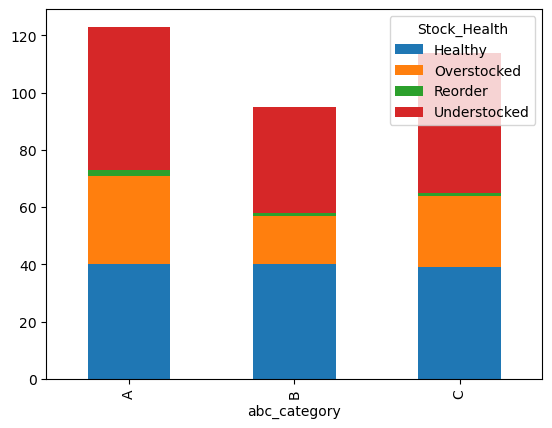

In [142]:
active_data.groupby(['abc_category', 'Stock_Health']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)

In [145]:
active_data.to_csv('Active_Products.csv')